# 1. házi feladat (HF1)
Beadási határidő: szeptember 27. éjfél

Beküldés: a Microsoft Teams felületén keresztül

Adj szöveges választ is, ahol a feladatkitűzés ezt kéri!

---

## 1. feladat (HF1/1) (6 pont)

Ebben a feladatban különböző országok, illetve régiók jövedelemegyenlőtlenségét és várható élettartamát fogjuk vizsgálni.

In [3]:
#importáltam a megfelelő csomagokat a feladathoz

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**a)** (1 pont)<br>
Töltsd be egy pandas DataFrame-be az Adatok mappában található *countries.csv* nevű fájlt, és nevezd el az objektumot *countries*nak.<br>
> Tipp: használj relatív elérési útvonalakat a tárgymappa mappaszerkezetét alapul véve!

A Gapminder (http://www.gapminder.org/data/) adataiból keresd ki az *Income per person (GDP/capita, PPP$ inflation-adjusted)* és *Life expentancy (years)* nevű adatállományokat, és töltsd be őket egy *income* és *life_exp* nevű pandas DataFrame-be. Az adatokat közvetlenül a honlapról töltsd be, anélkül, hogy azt előbb lementenéd a saját gépedre!<br>
> Tipp: használd a *pandas.read_excel()* függvényt!

In [5]:
#beolvastam az adatokat a megfelelő mappából és honlapokról

,geo,Country Name,1800,1801,1802,1803,1804,1805,1806,1807,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,afg,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,2546.0,2602.0,2657.0,2711.0,2767.0,2823.0,2880.0,2939.0,2999.0,3060.0
1,alb,Albania,667.0,667.0,667.0,667.0,667.0,668.0,668.0,668.0,...,19358.0,19781.0,20197.0,20613.0,21034.0,21463.0,21899.0,22345.0,22799.0,23263.0
2,dza,Algeria,715.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,...,14343.0,14607.0,14890.0,15188.0,15495.0,15810.0,16131.0,16459.0,16794.0,17135.0
3,and,Andorra,1197.0,1199.0,1201.0,1204.0,1206.0,1208.0,1210.0,1212.0,...,73605.0,75142.0,76689.0,78256.0,79850.0,81475.0,83132.0,84823.0,86548.0,88308.0
4,ago,Angola,618.0,620.0,623.0,626.0,628.0,631.0,634.0,637.0,...,6109.0,6227.0,6352.0,6480.0,6611.0,6745.0,6883.0,7023.0,7165.0,7311.0


In [4]:
countries = pd.read_csv('../Adatok/countries.csv')
income = pd.read_excel('https://docs.google.com/spreadsheets/d/10vHiHnBQre07TwX75vTc_H1lf-w5-hbe5mZH4ro6QNE/export?format=xlsx', sheet_name = 4, header = 2, nrows = 197)
life_exp = pd.read_excel('https://docs.google.com/spreadsheets/d/11mulzUH3_cueq-V9D5KIlo9oHE9YYZrUSeVyCin7_rM/export?format=xlsx', sheet_name = 5, header = 3, nrows = 197)

**b)** (1 pont)<br>
Ábrázold hisztogramon az egy főre jutó jövedelem eloszlását egy adott évre (például 2007-re) vonatkozóan!<br>

In [6]:
#ábrázoltam hisztogrammon a jövedelmet 2007-es évből, azaz 2007-es oszlopot

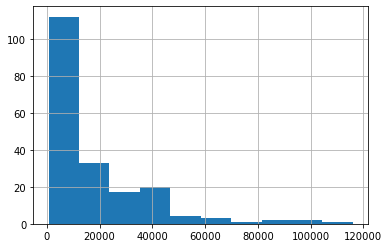

In [3]:
income[2007].hist()

**c)** (1 pont)<br>
Írj egy olyan függvényt, amely egy adott évre (ez legyen állítható bementi paraméter) összeilleszti (merge) a *countries*, *income* és *life_exp* adattáblákat!<br>

> Tipp: használd a *pd.merge()* függvényt!

In [9]:
#az összeilleszt függvényben két merge alkalmazásával teszmészetes illesztést hajtottam végre a kezdetben beolvasott adatokon
#az évek, azaz oszlopok alapján, azaz minden értékhez a meg megfelelő sort hozzápárosítottam

In [8]:
def osszeilleszt(ev):
    left = countries
    right = income[['Country Name', ev]]
    result = pd.merge(left, right, left_on = 'Country', right_on = 'Country Name', suffixes= ('_income','_life_exp')).drop('Country Name',1)
    left = result
    right = life_exp[['name', ev]]
    reresult = pd.merge(left, right, left_on = 'Country', right_on = 'name',suffixes= ('_income','_life_exp')).drop('name',1)
    return reresult

**d)** (2 pont)<br>
Az előző feladatrészben létrehozott adattábla segítségével készíts régiónként (kontinensenként) összevont (csoportosított) boxplotokat az egy főre jutó jövedelem eloszlására vonatkozóan 1950-re és 2010-re. A jövedelmet ábrázold logaritmikus skálán! Mi változott a 60 év alatt?<br>
> Tipp: használd a *pd.boxplot* függvényt!

In [10]:
#itt ábrázoltam boxploton, előszört évenként külön kölün, majd egybefűzve is, amelyhez létrehoztam először egy külön dataframet,
#hogy könnyebben ábrázolhassam

In [11]:
jovedelem = pd.merge(osszeilleszt(1950), osszeilleszt(2010))

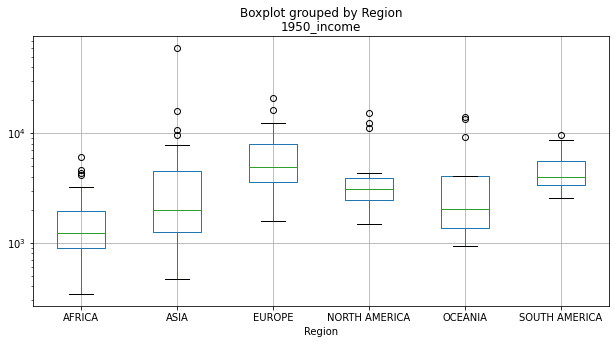

In [12]:
jovedelem.boxplot(column = ['1950_income'], by = 'Region', figsize = (10, 5)).set_yscale('log')

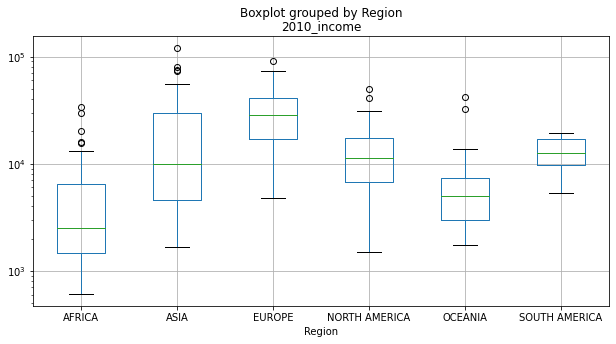

In [13]:
jovedelem.boxplot( column = ['2010_income'], by = 'Region', figsize = (10, 5)).set_yscale('log')

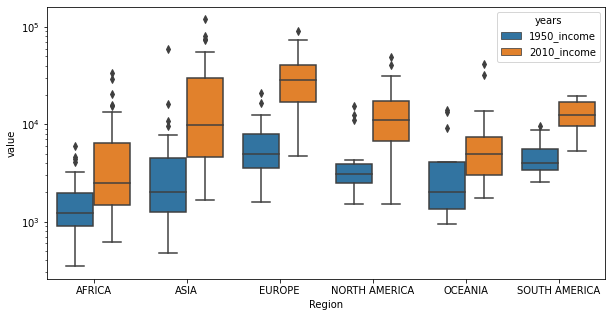

In [14]:
dd = pd.melt(jovedelem, id_vars = ['Region'], value_vars = ['1950_income', '2010_income'], var_name = 'years')
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Region', y = 'value', data = dd, hue = 'years').set_yscale('log')

A jövedelem az alatt a 60 év alatt nagyságrendekkel emelkedett.

**e)** (1 pont)<br>
A c) feladatrészben létrehozott adattábla segítségével készíts egy szórásdiagramot ([scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html)), melyen ábrázolod egy tetszőleges évben az országokban az egy főre jutó jövedelem és a várható élettartam viszonyát. Milyen következtetést tudsz levonni az ábra alapján?<br>
> Tipp: válassz olyan évet, amelyben nincs sok hiányzó adat!

In [ ]:
#a korábban megírt függvény segítségével ábrázoltam a pontfelhőt

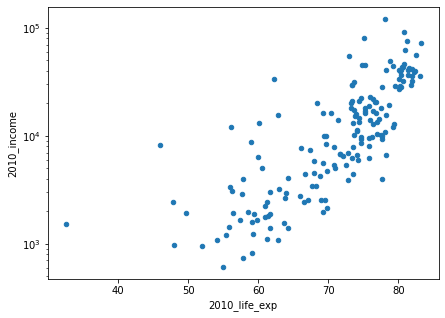

In [9]:
osszeilleszt(2010).plot.scatter(x = '2010_life_exp', y = '2010_income', figsize = (7,5)).set_yscale('log')

Az országok többségében 2010-ben a magasabb életkorhoz magasabb jövedelem társult.

---

## 2. feladat (HF1/2) (6 pont)

Ebben a feladatban a legnagyobb amerikai álláskereső portál adattudós állásait fogjuk vizsgálni.

In [5]:
#importáltam a feladathoz szükséges csomagokat

In [6]:
from urllib.request import urlopen

**a)** (1 pont)<br>
A tanult módon töltsd be az *urllib* és *BeautifulSoup* csomagok segítségével az *indeed.com* *data scientist* kulcsszóra kiadott találati oldalát, azaz ennek az URL-nek a tartalmát: http://www.indeed.com/jobs?q=data+scientist&l= . Írj egy függvényt, amelynek visszatérési értéke a kapott keresési találatok száma!
<br>
> Tipp: a *searchCount* azonosítójú HTML taget érdemes nézni!

In [7]:
#beolvastam az adatokat a megfelelő url címről utf8-as kódolással majd egy .find() függvény segítségével rákerestem a 
#pozíciójára, és kiirattam az előtte álló szring karaktereit

In [10]:
url = 'https://www.indeed.com/q-data-scientist-jobs.html?vjk=96d6fe304e9158c8'
source = urlopen(url).read().decode('utf-8')
position = source.find('Data Scientist jobs available')
print(source[position-7:position-1])

10,757


**b)** (3 pont)<br>
Az első 100 találati oldal alapján derítsd ki, hogy melyek a leggyakoribb szavak, amik szerepelnek az adattudós állások hirdetéseiben! Készíts egy szófelhőt, amin a leggyakoribb szavakat vizualizálod az első 100 találati oldalon szereplő hirdetések alapján!<br>
> Tipp: az egyes találati oldalak címei:
https://www.indeed.com/jobs?q=data%20scientist&start=0, https://www.indeed.com/jobs?q=data%20scientist&start=10, https://www.indeed.com/jobs?q=data%20scientist&start=20 és így tovább 10-esével.

> Tipp: itt rengeteg segítséget találsz azzal kapcsolatban, hogy hogyan kell szófelhőt készíteni: [wordcloud](https://www.datacamp.com/community/tutorials/wordcloud-python)

> Tipp: mind a száz oldal letöltése hosszú ideig eltarthat, ezért először tesztelj kevesebb találati oldallal, és csak végül futtasd le a kódod az első száz oldalra.

**c)** (2 pont)<br>
Az első 100 találati oldal alapján gyűjtsd össze a betöltendő állások helyszínére vonatkozó adatokat, és a leggyakrabban előforduló 10 város gyakoriságát ábrázold sávdiagramon! A "United States" és "Remote" helyszíneket szűrd ki a találatokból, csak városok legyenek!<br>
> Tipp: a szükséges információt a *location* azonosítójú HTML tagben találod.

---

## 3. feladat (HF1/3) (8 pont)

Ebben a feladatban a legközelebbi szomszéd (_k_NN) algoritmust kell megvalósítanod. Programozz le egy egyszerű *k*NN osztályozó algoritmust, ne használj beépített függvényeket!

In [ ]:
#importáltam a feladathoz szükséges csomagokat

In [1]:
import pandas as pd
import math
import numpy as np
from statistics import mode
import random

**a)** (1 pont)<br>
Ábrázold az Adatok mappában lévő *ring.csv* adatállományt. Ez egy két dimenzós adathalmaz, az utolsó oszlop a címkeváltozó értékét tartalmazza!<br>
> Tipp: készíts scatter plot ábrát!

In [2]:
#beolvastam az adatokat a megadott mappából, majd ábrázoltam a pontfelhőt

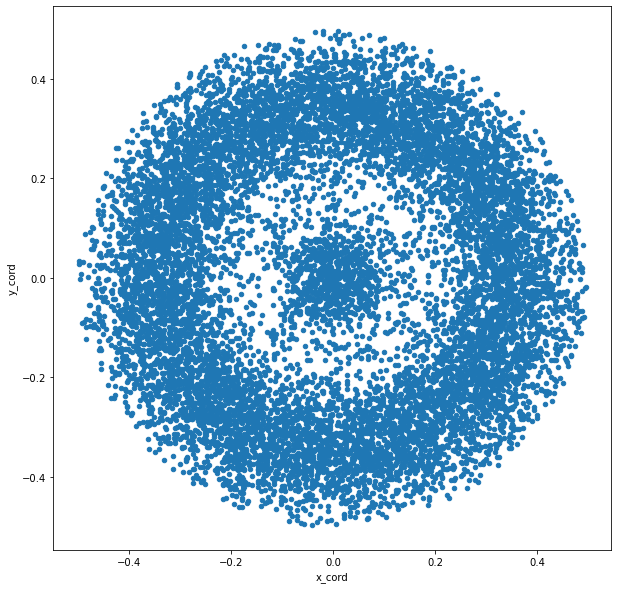

In [3]:
cols = ['x_cord', 'y_cord', 'tag']
ring = pd.read_csv('../Adatok/ring.csv', names = cols, header = None)
ring.plot.scatter(x = 'x_cord', y = 'y_cord', figsize = (10,10))

**b)** (1 pont)<br>
Írj egy saját Minkowski-távolság függvényt amelynek bemeneti paramétere két vektor és a Minkowski-távolság *p* kitevője!<br>

In [4]:
#az előadáson látott képlet alapján megírtam a távolság függvényt, amely kiszámolja a képt input vektor komponensenkénti
#abszolut különbségek p-edik hatványának összegének p-edik gyökét, amely a minkowszki távolságukat adja meg

In [5]:
def minkowski_distance_calculator(a, b, p):
    dist = 0
    for i in range(len(a)):
        dist = dist + (abs(a[i]-b[i]))**p
    dist = dist**(1/p)
    return dist

**c)** (3 pont)<br>
Írj egy  függvényt, ami numerikus attribútumokkal rendelkező rekordokra megadja, hogy a Minkowski-távolság szerinti legközelebbi _k_ szomszédjának többségében mi a címkeváltozó értéke! A függvényben állítható paraméter legyen a Minkowski-távolság *p* kitevője és <i>k</i>, a szomszédok száma!<br>

In [6]:
#a függvény bemeneti paraaméterének megadtam még az adathalmazt, amiből meg kell keresse a szomszédok címkeváltozóit
#egy for-ciklusban kiszámoltam és eltároltam az összes adattól vett távolságát az új vektornak, majd ezt egy szótárrá
#alakítottam és rendeztem, ezután egy másik for-ciklussal egy másik listához hozzáadtam az előző szótár első k elemét,
#és ennek meghatároztam a leggyakoribb elemét, ami a legközelebbi k szomszéd címkéjének a többségét adta meg

In [22]:
def k_neighbours_tag(datas, new_rekord, p, k):
    new_tag = None
    neighbours = []
    distance_i = 0
    length = len(new_rekord)
    tags = []
    for i in range(len(datas)):
        distance_i = minkowski_distance_calculator(new_rekord, datas[i], p)
        neighbours.append([distance_i, datas[i][length]])
    sorted_neighbours = sorted(neighbours, key = lambda x: x[0])
    for i in range(k):
        tags.append(sorted_neighbours[i][1])
        print(sorted_neighbours[i][1])
    new_tag = mode(tags)
    return new_tag

**d)** (3 pont)<br>
Próbáld ki az algoritmusodat az Adatok mappában lévő *ring.csv* adathalmazon! A rekordok *véletlenszerűen* választott kétharmadát tekintsd tanítóadatnak. Milyen arányban találja el az algoritmus a maradék 1/3-nyi adatrészen a helyes címkét? Próbáld ki az algoritmusodat több paraméterbeállítással is! Mit tapasztalsz?<br>
> Tipp: használj relatív elérési útvonalakat a tárgymappa mappaszerkezetét alapul véve!

> Tipp: az algoritmus futása hosszú ideig tarthat, ezért teszteléskor használj véletlenszerűen választott, kisebb részhalmazokat, és csak végül futtasd le a teszteket a teljes adathalmazon.

In [8]:
#betöltöttem az adatokat, és első körös tesztelésként csak egy kicsi adathalmazt hoztam létre, valamint megadtam kezdőadatokat

In [9]:
ring = pd.read_csv('../Adatok/ring.csv', names = cols, header = None)
ring = np.array(ring)
np.random.shuffle(ring)
proba_data = ring[:30]
small_train_data = proba_data[:20]
small_test_data = proba_data[20:]
new_rekords = [[0,0],[0.1,0.1],[-0.1,-0.1],[-0.2578,0.3459],[0,0.1111]]
p_s = [1, 2, 3]
k_s = [3, 5, 10]

In [10]:
#itt egy hármas for-ciklusban betanítottam az általam megadott vektorokra, k és p paraméterekre a létrehozott kisméretű
#adattáblára a legközelebbi k szomszéd függvényemet

In [14]:
small_train_results = []
for i in new_rekords:
    for j in p_s:
        for l in k_s:
            small_train_results.append(k_neighbours_tag(small_train_data, i, j, l))
print(small_train_results)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [15]:
#itt egy hármas for-ciklusban teszteltem az általam megadott vektorokra, k és p paraméterekre a létrehozott kisméretű
#adattáblára a legközelebbi k szomszéd függvényemet

In [16]:
small_test_results = []
for i in new_rekords:
    for j in p_s:
        for l in k_s:
            small_test_results.append(k_neighbours_tag(small_test_data, i, j, l))
print(small_test_results)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


A címke ugyanaz lett minden beállításnál, tehát valószínű, hogy ez a címke fordul elő a leggyakrabban az adathalmazban.

In [17]:
#itt felosztottam az adatokat 2/3-ad 1/3-ad részre, hogy megnézzem a modellem működését a korábbi paraméterekkel

In [18]:
ring = pd.read_csv('../Adatok/ring.csv', names = cols, header = None)
ring = np.array(ring)
rasio = int((2/3)*len(ring))
np.random.shuffle(ring)
train_data = proba_data[:rasio]
test_data = proba_data[rasio:]
new_rekords = [[0,0],[0.1,0.1],[-0.1,-0.1],[-0.2578,0.3459],[0,0.1111]]
p_s = [1, 2, 3]
k_s = [3, 5, 10]

In [19]:
#itt próbáltam betanítani a modellt a teljes adat 2/3-dával

In [20]:
train_results = []
for i in new_rekords:
    for j in p_s:
        for l in k_s:
            train_results.append(k_neighbours_tag(train_data, i, j, l))
print(train_results)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
#itt próbáltam tesztelni a modellt az adatok 1/3-dával, de nem sikerült...

In [23]:
test_results = []
for i in new_rekords:
    for j in p_s:
        for l in k_s:
            test_results.append(k_neighbours_tag(test_data, i, j, l))
print(test_results)

IndexError: list index out of range

---